# Xác định kích thước dữ liệu vào và bậc tăng trưởng độ phức tạp thuật toán

1. (2.1.3) Consider a classic sequential search that scans a list to search the occurrences of a given search key in the list. Discuss the worst case, average case, and best case efficiency of classic sequential search.

    - Best case: O(1) - Tìm thấy phần tử ở vị trí đầu tiên
    - Worst case: O(n) - Tìm không thấy phần tử hoặc tìm thấy phần tử ở vị trí cuối cùng
    - Average case: O(n/2) - Tìm thấy phần tử ở vị trí giữa

2. (2.1.5)
    - Prove formula $b = \lfloor log_2(n)\rfloor  + 1$ for the number of bits in the binary representation of a positive decimal integer.
        - $n$ là một số nguyên dương, $b$ là số bit để biểu diễn số $n$. Ta có $n < 2^b \Rightarrow log_2(n) < b$ mà b là số nguyên ta có thể viết lại là $b = \lfloor log_2(n) \rfloor + 1$.
    - Prove the alternative formula for the number of bits in the binary representation of a positive integer $n$: $b = \lceil log_2(n+1) \rceil$
       - $n$ là một số nguyên dương, $b$ là số bit để biểu diễn số $n$. Với $n + 1 = 2^b$ ta có $log_2(n+1) = b $ mà $b$ là số nguyên nên $b = \lceil log_2(n+1) \rceil$.
    - What would be the analogous formulas for the number of decimal digits?
       - Tương tự thì ta sẽ có hai công thức để biểu diễn số thập phân $n$ bằng $b$ chữ số: $b = \lfloor log_{10}(n) \rfloor + 1$ và $b = \lceil log_{10}(n+1) \rceil$
    - Explain why, within the accepted analysis framework, it does not matter whether we use binary or decimal digits in measuring n’s size.
       - Vì kích thước cần để biểu diễn số $n$ phụ thuộc và tỉ lệ thuận với hàm logarit. Cơ số của logarit chỉ xác định hằng số tỷ lệ, nhưng không ảnh hưởng đến tốc độ tăng tiệm cận của hàm.

3. (2.1.6) Suggest how any sorting algorithm can be augmented in a way to make the best-case count of its key comparisons equal to just n − 1 (n is a list’s size, of course). Do you think it would be a worthwhile addition to any sorting algorithm?

    - Chúng ta sẽ kiểm tra mảng xem mảng đã được sắp xếp chưa, nếu đã được sắp xếp thì không cần sắp xếp nữa. Điều này sẽ giúp giảm số lần so sánh xuống còn n-1. Điều này đã được áp dụng trong insertion sort và advanced bubble sort, ...
    - Đối với dữ liệu đã được sắp xếp thì thuật toán sắp xếp sẽ không có tác dụng gì, nên việc thêm chức năng này sẽ giảm bớt việc sắp xếp không cần thiết.
    - Đối với dữ liệu thô chưa được xử lý số liệu gần như ngẫu nhiên chưa được sắp xếp thì việc so sánh này hoàn toàn vô dụng, tốn thêm 1 lần so sánh. Nhưng sau khi được sắp xếp một lần rồi thì mỗi lần thêm dữ liệu mới, dãy sẽ trở thành nearly sorted, nên việc thêm chức năng này sẽ giúp tăng hiệu suất của thuật toán.

# Xác định mối quan hệ độ phức tạp thuật toán theo kí pháp tiệm cận

1. (2.2.5) List the following functions according to their order of growth from the lowest to the highest: $(n^2 + 3)!, 2lg(n + 50)^3, 3^{3n}, 0.05n^{10}+3^{n^3}+1,ln^3n, \sqrt{n}, 3^{2n}$
$$ \sqrt{n} < ln^3n < 2lg(n + 50)^3 < 3^{2n} < 3^{3n} < 0.05n^{10}+3^{n^3}+1 < (n^2 + 3)!$$
- 3 hàm đầu tiên là hàm phụ tuyến tính, hàm căn tăng trưởng chậm hơn hàm logarit, hàm logarit tăng trưởng chậm hơn hàm bậc hai,
- 2 hàm sau là hàm mũ, mũ bậc 2 tăng trưởng chậm hơn mũ bậc 3, và nhanh hơn các hàm phụ tuyến tính
- Hàm tiếp theo là hàm bình phương kết hợp giai thừa tăng trưởng nhanh hơn hàm mũ
- Hàm cuối cùng là hàm siêu tăng trưởng, hàm mũ kết hợp hàm lập phương tăng trưởng nhanh nhất


In [34]:
import math
f1 = lambda x:math.factorial(x**2 + 3)
f2 = lambda x:2 * math.log((x + 50)**3, 2)
f3 = lambda x:3**(3*x)
f4 = lambda x:x**10//20 + 3**(x**3) + 1
f5 = lambda x:math.log(x)**3
f6 = lambda x:math.sqrt(x)
f7 = lambda x:3**(2*x)

def deviate(f, x = 100):
    return f(x + 1) - f(x)

deviate_result = [{"f1": deviate(f1)}, {"f2": deviate(f2)}, {"f3": deviate(f3)},
                  {"f4": deviate(f4)}, {"f5": deviate(f5)}, {"f6": deviate(f6)},
                  {"f7": deviate(f7)}]

deviate_result.sort(key=lambda x: list(x.values())[0])

for i in deviate_result:
    print(list(i.keys())[0], sep=" ", end=" ")

f6 f2 f5 f7 f3 f1 f4 

2. (2.2.11) Lighter or heavier? You have n > 2 identical-looking coins and a two-pan balance scale with no weights. One of the coins is a fake, but you do not know whether it is lighter or heavier than the genuine coins, which all weigh the same. Design a $\Theta(1)$ algorithm to determine whether the fake coin is lighter or heavier than the others.
    1. Chia làm hai đống có số tiền bằng nhau, nếu có đồng xu dư sẽ để riêng
    2. So 2 đống đồng xu nếu
        - 2 đống đồng xu bằng nhau -> đồng xu dư là giả
            - Cân đồng xu giả với đồng xu thật (Case 1: 2 lần cân)
        - 2 đống xu không bằng nhau -> đồng xu giả ở 1 trong 2 đống
            - Lấy đống nhẹ hơn, chia làm đôi rồi so sánh
                - Nếu hai đống cân bằng nhau -> đồng xu giả nặng hơn ở đống nặng hơn (Case 2: 2 lần cân)
                - Nếu hai đống cân không bằng nhau -> xu giả nhẹ hơn và nằm ở đống nhẹ hơn sau khi chia đôi từ đống nhẹ hơn (Case 3: 2 lần cân)
    - Như vậy thuật toán cần 2 lần so sánh, độ phức tạp $\Theta(2)$
3. (2.2.12) Door in a wall You are facing a wall that stretches infinitely in both directions. There is a door in the wall, but you know neither how far away nor in which direction. You can see the door only when you are right next to it. Design an algorithm that enables you to reach the door by walking at most $O(n)$ steps where n is the (unknown to you) number of steps between your initial position and the door.
    - Chiều dương là chiều hướng sang phải, ta đi rồi lại quay lại vị trí ban đầu theo công thức $S_n=(-2)^n * (S_{n-1})$ với $S_0=1$.
    - Nếu cánh cửa ở trước mặt, ta cần đi sang phải để thấy nó.
    - Nếu cánh cửa ở bên trái ta cứ đi sẽ luôn tìm thấy cửa
    - Nếu cánh cửa ở bên phải, ta cần đi qua nó để thấy
    - Như vậy sau $n$ bước, ta luôn tìm thấy cửa, độ phức tạp $O(n)$
# Thiết kế thuật toán, chứng minh tính đúng và xác định độ phức tạp của thuật toán
Bài toán: Xây dựng thuật toán sắp xếp chọn theo ý tưởng sau: sắp xếp n số lưu trong mảng a bằng cách tìm phần tử nhỏ nhất của a và đổi nó với phần tử a[1]. Sau đó tìm phần tử nhỏ thứ hai của a, và đổi nó với a[2]. Tiếp tục với n − 1 phần tử của a.
1. Viết mã giả cho thuật toán này.
    - Mã giả Python

In [35]:
def selection_sort(a):
    for i in range(len(a)-1):
        min_index = i
        for j in range(i + 1, len(a)):
            if a[j] < a[min_index]:
                min_index = j
        a[i], a[min_index] = a[min_index], a[i]


2. Vì sao chỉ cần thực hiện với $n − 1$ phần tử đầu tiên, thay cho cả n phần tử?
    - Vì $n - 1$ phần tử kia đã được sắp xếp về đúng vị trí của nó
3. Đưa ra đánh giá thời gian thực hiện thuật toán trong trường hợp tốt nhất và xấu nhất theo kí hiệu $O$.
    - Số lần lặp luôn là $S = n - 2 + n - 3 + ... + 1 \;(n - 1\; time)$ nên độ phức tập thuật toán là $S_n = \frac{n(n-2+1)}{2}=\frac{n^2-n}{2}$ nên độ phức tạp là $O(n^2)$ ở mọi trường hợp
4. Viết chương trình và thực hiện với dãy có số lượng lớn phần tử được sinh ngẫu nhiên. Đo thời gian thực hiện, vẽ biểu đồ sự phụ thuộc thời gian vào kích thước n.

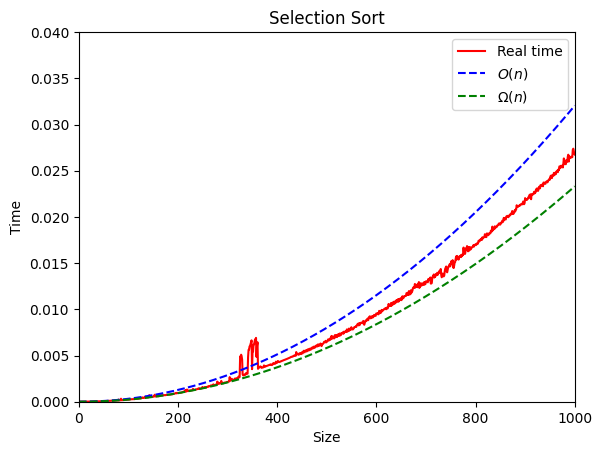

In [36]:
import random
from matplotlib import pyplot as plt
import time
import numpy as np

sample = []
size = np.linspace(0, 1000, 1000)
runtime = []
for i in range(1000):
    sample.append(i)
    random.shuffle(sample)
    start_time = time.time()
    selection_sort(sample)
    end_time = time.time()
    runtime.append(end_time - start_time)

plt.plot(size, runtime, color='red', label="Real time")
f = lambda x: ((x**2-x)/2)/(2.4*10**9/14/11)
plt.plot(size, f(size), 'b--', label="$O(n)$")
f = lambda x: ((x**2-x)/2)/(2.4*10**9/14/8)
plt.plot(size, f(size), 'g--', label="$\Omega(n)$")
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('Selection Sort')
plt.xlim(0, 1000)
plt.ylim(0, 0.04)
plt.legend()
plt.show()

CPU (Intel Core i5 9300H) base clock khi cắm sạc 2.4GHz, Python chậm hơn C 14 lần, trong worst case có 11 thao tác trong vòng lặp (gán i, j, min_index, so sánh a[j] với a[min_index] (3 phép toán 2 lấy giá trị, 1 so sánh), đổi chỗ a[i] và a[min_index] (đổi chỗ bằng 2 phép gán và 2 phép lấy giá trị), phép gán khi if đúng). Đường màu xanh dương là đường dự đoán cho trường hợp worst case sẽ luôn cao hơn đường màu đỏ vì có thêm phép gán khi if đúng. Đường màu xanh lá cây là đường dự đoán cho trường hợp best case sẽ luôn thấp hơn đường màu đỏ vì không có phép gán khi if đúng cũng như phép đổi chỗ bị lặp (còn lại 1 thao tác lấy và 1 thao tác gán) nên có 8 thao tác. Đường màu đỏ cao hơn đường màu xanh dương do CPU không đạt base clock